<a href="https://colab.research.google.com/github/lukasdekanovsky/Become_PythonDeveloper_AI/blob/main/KONVOLUCNI_(CNN)_Rozpozn%C3%A1v%C3%A1n%C3%AD_obr%C3%A1zku_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimalizovaný model konvoluční neuronové sítě pro rozpoznávání obrazu (barevný) + optimalizace

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
print(x_train[0]) #vidíme že obrázek je barevný, každý pixel má 3 barvy - nebrání optimalizaci dat / 255

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


(50000, 32, 32, 3)


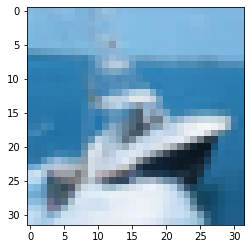

In [ ]:
plt.imshow(x_train[8])
print(x_train.shape)

In [ ]:
pocet_kategorii = len(set(y_train))
print("Počet kategorií:", pocet_kategorii)

Počet kategorií: 10


In [ ]:
kategorie = '''letadlo
automobil
pták
kočka
jelen
pes
žába
kůň
loď
náklaďák'''.split()

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)
y_train, y_test = y_train.flatten(), y_test.flatten() # musíme snížit dimenzi
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)
y_train.shape (50000,)


In [ ]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(pocet_kategorii, activation='softmax')(x)

model = Model(i, x)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 45s 28ms/step - loss: 1.5116 - accuracy: 0.4513 - val_loss: 1.2706 - val_accuracy: 0.5434
Epoch 2/15
1563/1563 [==============================] - 43s 27ms/step - loss: 1.1958 - accuracy: 0.5748 - val_loss: 1.0693 - val_accuracy: 0.6184
Epoch 3/15
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0408 - accuracy: 0.6309 - val_loss: 1.0127 - val_accuracy: 0.6439
Epoch 4/15
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9265 - accuracy: 0.6732 - val_loss: 0.9337 - val_accuracy: 0.6700
Epoch 5/15
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8429 - accuracy: 0.7024 - val_loss: 0.9263 - val_accuracy: 0.6773
Epoch 6/15
1563/1563 [==============================] - 43s 28ms/step - loss: 0.7643 - accuracy: 0.7285 - val_loss: 0.9034 - val_accuracy: 0.6882
Epoch 7/15
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6937 - accuracy: 0.7537 - val_loss: 0.8962 -

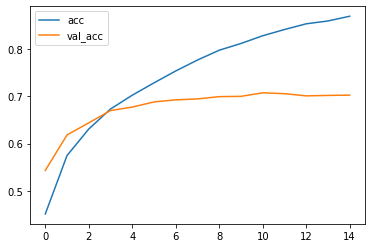

In [ ]:
plt.plot(result.history['accuracy'], label='acc')
plt.plot(result.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 5s 15ms/step


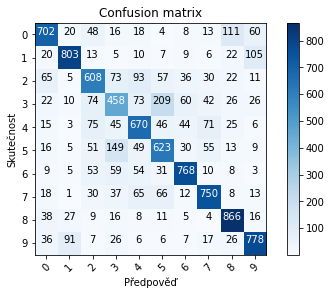

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def vykresli_confusion_matrix(cm, kategorie):
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(kategorie))
  plt.xticks(tick_marks, kategorie, rotation=45)
  plt.yticks(tick_marks, kategorie)

  fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('Skutečnost')
  plt.xlabel('Předpověď')
  plt.show()

predikce_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, predikce_test)
vykresli_confusion_matrix(cm, kategorie=list(range(10)))

Text(0.5, 1.0, 'Skutečnost: kůň Odhadnuto jako: kočka')

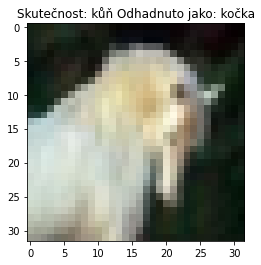

In [ ]:
indexy_spatne_uhadlych = np.where(predikce_test != y_test)[0]
random_index = np.random.choice(indexy_spatne_uhadlych)
plt.imshow(x_test[random_index].reshape(32,32,3), cmap='gray')
plt.title(f"Skutečnost: {kategorie[y_test[random_index]]} Odhadnuto jako: {kategorie[predikce_test[random_index]]}")

# Optimalizace neuronové sítě

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
y_train, y_test = y_train.flatten(), y_test.flatten()

In [ ]:
pocet_kategorii = len(set(y_train))

In [ ]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(pocet_kategorii, activation='softmax')(x)

model = Model(i, x)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
batch_velikost = 32
x_train.shape[0]//batch_velikost

1562

In [ ]:
batch_velikost = 32
generator_augmentovanych_dat = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
generator_uceni = generator_augmentovanych_dat.flow(x_train, y_train, batch_velikost)
nkroku_na_epochu = x_train.shape[0] // batch_velikost
result = model.fit(generator_uceni, validation_data=(x_test, y_test), steps_per_epoch=nkroku_na_epochu, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 533s 341ms/step - loss: 1.4286 - accuracy: 0.5053 - val_loss: 1.0910 - val_accuracy: 0.6221
Epoch 2/50
1562/1562 [==============================] - 537s 343ms/step - loss: 0.9990 - accuracy: 0.6508 - val_loss: 0.9040 - val_accuracy: 0.6758
Epoch 3/50
1562/1562 [==============================] - 540s 345ms/step - loss: 0.8528 - accuracy: 0.7030 - val_loss: 0.7763 - val_accuracy: 0.7329
Epoch 4/50
1562/1562 [==============================] - 528s 338ms/step - loss: 0.7544 - accuracy: 0.7416 - val_loss: 0.7051 - val_accuracy: 0.7673
Epoch 5/50
1562/1562 [==============================] - 531s 340ms/step - loss: 0.6886 - accuracy: 0.7662 - val_loss: 0.6732 - val_accuracy: 0.7700
Epoch 6/50
1562/1562 [==============================] - 529s 339ms/step - loss: 0.6392 - accuracy: 0.7823 - val_loss: 0.6448 - val_accuracy: 0.7835
Epoch 7/50
1562/1562 [==============================] - 530s 339ms/step - loss: 0.5871 - accuracy: 0.8017 - val_

KeyboardInterrupt: ignored

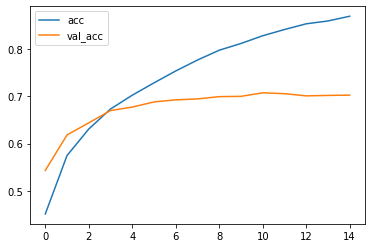

In [ ]:
plt.plot(result.history['accuracy'], label='acc')
plt.plot(result.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 37s 116ms/step


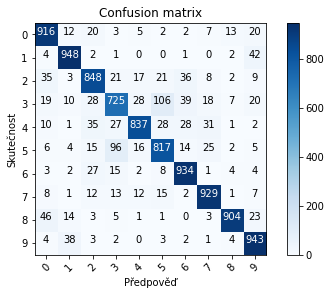

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def vykresli_confusion_matrix(cm, kategorie):
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(kategorie))
  plt.xticks(tick_marks, kategorie, rotation=45)
  plt.yticks(tick_marks, kategorie)

  fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('Skutečnost')
  plt.xlabel('Předpověď')
  plt.show()

predikce_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, predikce_test)
vykresli_confusion_matrix(cm, kategorie=list(range(10)))

Text(0.5, 1.0, 'Skutečnost: loď Odhadnuto jako: letadlo')

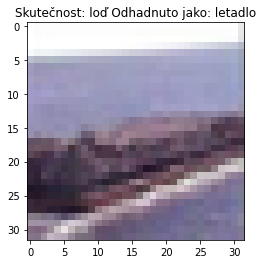

In [ ]:
indexy_spatne_uhadlych = np.where(predikce_test != y_test)[0]
random_index = np.random.choice(indexy_spatne_uhadlych)
plt.imshow(x_test[random_index], cmap='gray')
plt.title(f"Skutečnost: {kategorie[y_test[random_index]]} Odhadnuto jako: {kategorie[predikce_test[random_index]]}")

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0   